In [55]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind


# from libraries.settings import *
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import itertools

In [56]:
xl = pd.ExcelFile('pcari_userdata.xlsx')
# xl.sheet_names
df_userdata = pd.read_excel('pcari_userdata.xlsx',sheetname=0)
df_userdata.head()

,id,age,barangay,user_id,language,gender,date_joined,Unnamed: 7,Barangay,Municipality / City,Field Test
0,19.0,12.0,ad,178.0,Filipino,M,2016-07-21 21:12:00,NaN,Unknown,Unknown,Unknown
1,26.0,22.0,Banaba,501.0,Filipino,M,2016-11-30 10:02:00,NaN,Brgy. Banaba,San Mateo,Unknown
2,38.0,22.0,Banaba,545.0,Filipino,F,2016-12-01 05:33:00,NaN,Brgy. Banaba,San Mateo,Unknown
3,43.0,-1.0,Banaba,552.0,Filipino,F,2016-12-01 06:56:00,NaN,Brgy. Banaba,San Mateo,Unknown
4,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,NaN,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila"


In [57]:
df_userdata.shape

(2311, 11)

In [58]:
df_userdata.columns

Index(['id', ' age', 'barangay', 'user_id', 'language', 'gender',
       'date_joined', 'Unnamed: 7', 'Barangay', 'Municipality / City',
       'Field Test'],
      dtype='object')

In [59]:
df_userdata.isnull().sum()

id                        1
 age                      1
barangay                365
user_id                   1
language                  1
gender                  349
date_joined               1
Unnamed: 7             2311
Barangay               1853
Municipality / City    1850
Field Test             1156
dtype: int64

### Cleaning the demographics dataset

In [60]:
df_userdata.rename(columns={' age':'age'}, inplace=True)
df_userdata.rename(columns={'Field Test':'field_test'}, inplace=True)

In [61]:
df_userdata1 = df_userdata.dropna(subset=['field_test'])
df_userdata1.shape

(1155, 11)

In [62]:
df_userdata1 = df_userdata1.dropna(axis=1, how='all')

In [63]:
df_userdata1 = df_userdata1[df_userdata1.field_test != 'Unknown']

In [64]:
df_userdata1.shape

(1077, 10)

In [71]:
#creating age_groups
bins = [-2,17, 24, 34, 54, 200]
group_names = ['0','1', '2', '3', '4']
df_userdata1['age_group'] = pd.cut(df_userdata1['age'], bins, labels=group_names)
df_userdata1.head()


,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group
4,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3
6,52.0,22.0,412,577.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",1
7,53.0,66.0,412,579.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4
8,54.0,56.0,412,578.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4
9,55.0,61.0,Barangay 412,580.0,Filipino,F,2016-12-02 01:21:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4


In [66]:
#taking into account only  users who did not enter their age and who are 18 and above years 
df_userdata1 = df_userdata1[(df_userdata1['age'] <1) | (df_userdata1['age'] > 17) ]

In [67]:
len(df_userdata1[ (df_userdata1['age'] < 18) ])

122

In [30]:
len(df_userdata1[df_userdata1['age_group'] == '0'])

122

In [73]:
# age group 0 contains users who did not enter their age
len(df_userdata1[(df_userdata1['age_group'] == '0') &  (df_userdata1['age'] == 0)])

111

In [74]:
df_userdata1.age.unique()

array([ 50.,  22.,  66.,  56.,  61.,  21.,  35.,  40.,  31.,  39.,  41.,
        28.,  80.,  38.,  52.,  43.,  68.,  44.,  64.,  42.,  18.,  20.,
        34.,  53.,  48.,  72.,  36.,  51.,  63.,  76.,  77.,  62.,  65.,
        60.,  82.,  71.,  69.,  47.,  19.,  23.,  37.,  27.,  -1.,  26.,
        25.,  24.,  55.,  75.,  67.,  54.,  59.,  49.,  73.,  74.,  30.,
        70.,  83.,  78.,  33.,  32.,  29.,  58.,  45.,  88.,  81.,  57.,
        46.,   0.])

In [78]:
#total number of users
df_userdata1.shape

(998, 11)

In [79]:
df_userdata1.groupby('field_test').count()

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,age_group
field_test,,,,,,,,,,
"AMA Computer College, Iloilo",40,40,29,40,40,29,40,11,11,40
"AMA Computer University, Caloocan",79,79,48,79,79,48,79,31,31,79
Bicol University,31,31,19,31,31,20,31,12,12,31
Brgy. 59 Puro,31,31,13,31,31,13,31,31,31,31
"Brgy. Banaba, San Mateo, Rizal",154,154,150,154,154,149,154,154,154,154
Deaf Manila Districts Organization,16,16,16,16,16,16,16,0,0,16
National University,198,198,188,198,198,193,198,15,15,198
"SM Malls employees, Iloilo",75,75,66,75,75,66,75,9,9,75
"SM Malls employees, Malabon",54,54,51,54,54,49,54,3,3,54


In [26]:
df_userdata1.head()

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group
4,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3
6,52.0,22.0,412,577.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",1
7,53.0,66.0,412,579.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4
8,54.0,56.0,412,578.0,Filipino,F,2016-12-02 01:20:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4
9,55.0,61.0,Barangay 412,580.0,Filipino,F,2016-12-02 01:21:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",4


In [80]:
df_userdata1.isnull().sum()

id                       0
age                      0
barangay               129
user_id                  0
language                 0
gender                 123
date_joined              0
Barangay               630
Municipality / City    630
field_test               0
age_group                0
dtype: int64

In [83]:
df_userdata1.groupby('gender').count()

,id,age,barangay,user_id,language,date_joined,Barangay,Municipality / City,field_test,age_group
gender,,,,,,,,,,
F,411,411,405,411,411,411,150,150,411,411
M,464,464,460,464,464,464,98,98,464,464


In [84]:
df_userdata1.groupby('age_group').count()

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test
age_group,,,,,,,,,,
0,122,122,2,122,122,3,122,120,120,122
1,549,549,540,549,549,548,549,49,49,549
2,126,126,126,126,126,124,126,30,30,126
3,120,120,120,120,120,119,120,89,89,120
4,81,81,81,81,81,81,81,80,80,81


In [85]:
df_userdata1.groupby(['age_group','gender']).count()

id    age  barangay  user_id  language  date_joined  \
age_group gender                                                           
0         F         3.0    3.0       2.0      3.0       3.0          3.0   
          M         NaN    NaN       NaN      NaN       NaN          NaN   
1         F       230.0  230.0     225.0    230.0     230.0        230.0   
          M       318.0  318.0     314.0    318.0     318.0        318.0   
2         F        58.0   58.0      58.0     58.0      58.0         58.0   
          M        66.0   66.0      66.0     66.0      66.0         66.0   
3         F        73.0   73.0      73.0     73.0      73.0         73.0   
          M        46.0   46.0      46.0     46.0      46.0         46.0   
4         F        47.0   47.0      47.0     47.0      47.0         47.0   
          M        34.0   34.0      34.0     34.0      34.0         34.0   

                  Barangay  Municipality / City  field_test  
age_group gender                                             
0         F            1.0                  1.0         3.0  
          M            NaN                  NaN         NaN  
1         F           26.0                 26.0       230.0  
          M           23.0                 23.0       318.0  
2         F           19.0                 19.0        58.0  
          M           11.0                 11.0        66.0  
3         F           57.0                 57.0        73.0  
          M           31.0                 31.0        46.0  
4         F           47.0                 47.0        47.0  
          M           33.0                 33.0        34.0

In [87]:
df_userdata1[df_userdata1['age_group'] == '0']

,id,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group
186,553.0,-1.0,"1856 sulu st.sta.cruz,Manila City",1137.0,English,F,2017-01-28 08:41:00,NaN,NaN,Deaf Manila Districts Organization,0
190,557.0,-1.0,1843 e ibarra st samp,1141.0,English,F,2017-01-28 08:54:00,NaN,NaN,Deaf Manila Districts Organization,0
235,753.0,-1.0,NaN,1337.0,English,NaN,2017-03-14 04:22:00,Not indicated,Not indicated,National University,0
266,840.0,-1.0,NaN,1424.0,English,NaN,2017-03-15 10:48:00,Not indicated,Not indicated,National University,0
300,929.0,-1.0,NaN,1513.0,English,NaN,2017-03-17 06:48:00,Not indicated,Not indicated,National University,0
392,1064.0,-1.0,NaN,1650.0,English,NaN,2017-03-20 05:01:00,Not indicated,Not indicated,National University,0
496,1345.0,-1.0,NaN,1932.0,Filipino,NaN,2017-03-24 01:44:00,Not indicated,Not indicated,"Brgy. Banaba, San Mateo, Rizal",0
529,1388.0,-1.0,NaN,1975.0,Filipino,NaN,2017-03-24 05:55:00,Not indicated,Not indicated,"Brgy. Banaba, San Mateo, Rizal",0
534,1393.0,-1.0,NaN,1980.0,Filipino,NaN,2017-03-24 06:00:00,Not indicated,Not indicated,"Brgy. Banaba, San Mateo, Rizal",0
567,1430.0,-1.0,NaN,2017.0,Filipino,NaN,2017-03-24 06:46:00,Not indicated,Not indicated,"Brgy. Banaba, San Mateo, Rizal",0


In [88]:
df_rating= pd.read_csv('pcari_rating.csv', names=['id', 'qid', 'date', 'score', 'user_id', 'response','accounted'])
df_rating.head()

,id,qid,date,score,user_id,response,accounted
0,464,7,2016-11-30 10:02:11.264866,8,501,NaN,0
1,465,8,2016-11-30 10:02:13.050095,4,501,NaN,0
2,466,5,2016-11-30 10:02:15.020859,2,501,NaN,0
3,467,2,2016-11-30 10:02:16.921314,8,501,NaN,0
4,468,6,2016-11-30 10:02:18.461902,8,501,NaN,0


In [89]:
df_rating = df_rating.dropna(axis=1, how='all')
df_rating = df_rating.drop('accounted', axis=1)

In [90]:
df_rating.describe()

,id,qid,score,user_id
count,8197.000000,8197.000000,8197.000000,8197.000000
mean,8638.824448,4.480420,5.614737,1875.636330
std,3863.108227,2.292489,3.155119,636.472106
min,464.000000,1.000000,-2.000000,178.000000
25%,5701.000000,2.000000,4.000000,1415.000000
50%,9512.000000,4.000000,6.000000,1952.000000
75%,11984.000000,6.000000,9.000000,2442.000000
max,14033.000000,8.000000,9.000000,2778.000000


In [91]:
df_rating.columns

Index(['id', 'qid', 'date', 'score', 'user_id'], dtype='object')

In [92]:
df_user_rating = pd.merge(df_userdata1, df_rating, on='user_id', how='left', suffixes=('_userdata', '_rating'))
df_user_rating.head()

,id_userdata,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group,id_rating,qid,date,score
0,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3,798.0,8.0,2016-12-02 01:05:53.603267,1.0
1,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3,799.0,7.0,2016-12-02 01:06:00.630710,1.0
2,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3,800.0,1.0,2016-12-02 01:06:24.412169,8.0
3,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3,801.0,6.0,2016-12-02 01:06:33.909184,7.0
4,49.0,50.0,412,568.0,Filipino,M,2016-12-02 01:03:00,Brgy. 412,Manila City,"Zone 42, Sampaloc, Manila",3,802.0,5.0,2016-12-02 01:06:43.901132,2.0


In [93]:
df_user_rating.groupby('user_id').count().sort('score').head()

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id_userdata,age,barangay,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group,id_rating,qid,date,score
user_id,,,,,,,,,,,,,,
2769.0,1,1,0,1,0,1,1,1,1,1,0,0,0,0
2632.0,1,1,0,1,0,1,1,1,1,1,0,0,0,0
2631.0,1,1,0,1,0,1,1,1,1,1,0,0,0,0
2628.0,1,1,0,1,0,1,1,1,1,1,0,0,0,0
2607.0,1,1,0,1,0,1,1,1,1,1,0,0,0,0


In [103]:
# removing rows which have no scores from users (included from the join)
df_user_rating = df_user_rating.dropna(axis=0,subset= ['score'])
df_user_rating.shape

(7157, 15)

In [95]:
df_user_rating_wo58 = df_user_rating[(df_user_rating.qid != 5) & (df_user_rating.qid !=8)]

In [96]:
df_score = df_user_rating_wo58.groupby('user_id').sum().sort('score',ascending = False)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [97]:
len(df_score[df_score.score > 36])

489

In [104]:
df_rating.to_csv('cleaned_quantitative_rating.csv')

In [105]:
df_userdata1.to_csv('cleaned_userdata.csv')

In [106]:
df_user_rating.groupby('age_group').count()

,id_userdata,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,id_rating,qid,date,score
age_group,,,,,,,,,,,,,,
0,149,149,16,149,149,24,149,133,133,149,149,149,149,149
1,4392,4392,4320,4392,4392,4384,4392,392,392,4392,4392,4392,4392,4392
2,1008,1008,1008,1008,1008,992,1008,240,240,1008,1008,1008,1008,1008
3,960,960,960,960,960,952,960,712,712,960,960,960,960,960
4,648,648,648,648,648,648,648,640,640,648,648,648,648,648


In [108]:
df_user_rating.isnull().sum()

id_userdata               0
age                       0
barangay                205
user_id                   0
language                  0
gender                  157
date_joined               0
Barangay               5040
Municipality / City    5040
field_test                0
age_group                 0
id_rating                 0
qid                       0
date                      0
score                     0
dtype: int64

In [109]:
len(df_user_rating.user_id.unique())

906

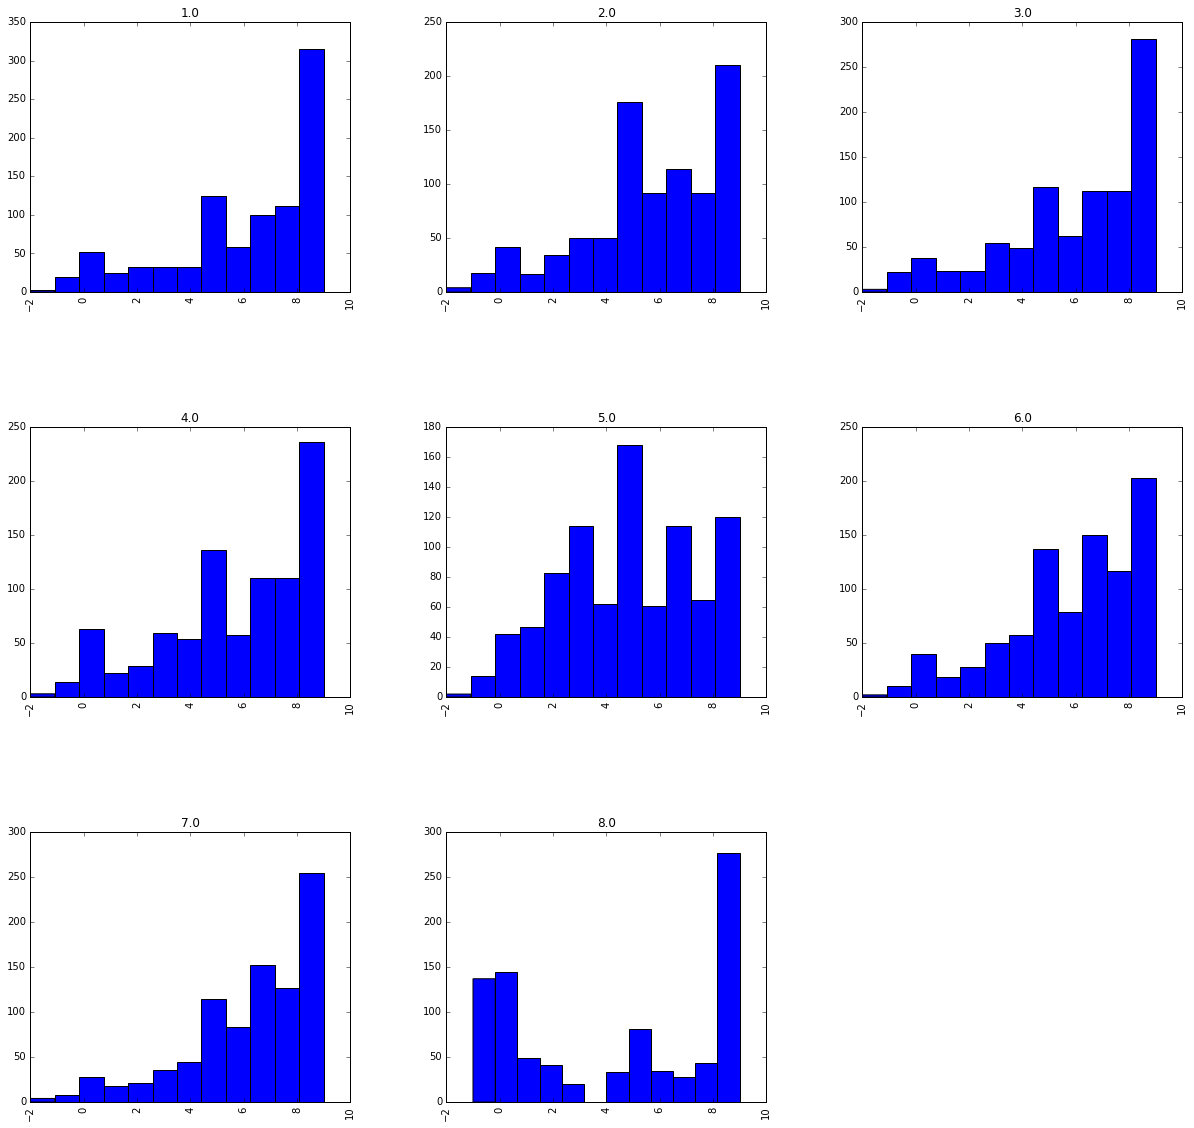

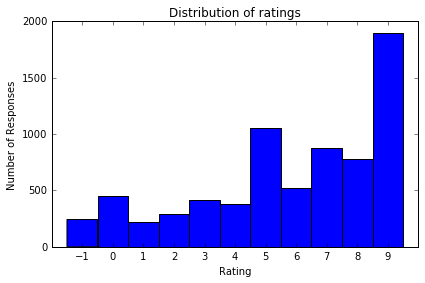

In [110]:
p =df_user_rating.hist(column='score',by=[df_user_rating.qid],bins=12,figsize=(20, 20))

plt.figure() 
plt.hist(df_user_rating.score,11, [-1.5, 9.5]) 
plt.xticks(np.arange(-1, 10))
plt.title('Distribution of ratings') 
plt.xlabel('Rating')
plt.ylabel('Number of Responses')
plt.tight_layout()

In [111]:
df_user_rating.groupby(['score']).count()

,id_userdata,age,barangay,user_id,language,gender,date_joined,Barangay,Municipality / City,field_test,age_group,id_rating,qid,date
score,,,,,,,,,,,,,,
-2.0,20,20,19,20,20,19,20,8,8,20,20,20,20,20
-1.0,242,242,222,242,242,225,242,135,135,242,242,242,242,242
0.0,450,450,442,450,450,443,450,87,87,450,450,450,450,450
1.0,220,220,215,220,220,216,220,47,47,220,220,220,220,220
2.0,292,292,284,292,292,287,292,67,67,292,292,292,292,292
3.0,417,417,409,417,417,407,417,88,88,417,417,417,417,417
4.0,382,382,375,382,382,374,382,66,66,382,382,382,382,382
5.0,1054,1054,1023,1054,1054,1032,1054,173,173,1054,1054,1054,1054,1054
6.0,526,526,511,526,526,517,526,107,107,526,526,526,526,526


In [112]:
df_user_rating.groupby(['age_group','gender']).count()

id_userdata   age  barangay  user_id  language  date_joined  \
age_group gender                                                                
0         F                24    24        16       24        24           24   
1         F              1840  1840      1800     1840      1840         1840   
          M              2544  2544      2512     2544      2544         2544   
2         F               464   464       464      464       464          464   
          M               528   528       528      528       528          528   
3         F               584   584       584      584       584          584   
          M               368   368       368      368       368          368   
4         F               376   376       376      376       376          376   
          M               272   272       272      272       272          272   

                  Barangay  Municipality / City  field_test  id_rating   qid  \
age_group gender                                                               
0         F              8                    8          24         24    24   
1         F            208                  208        1840       1840  1840   
          M            184                  184        2544       2544  2544   
2         F            152                  152         464        464   464   
          M             88                   88         528        528   528   
3         F            456                  456         584        584   584   
          M            248                  248         368        368   368   
4         F            376                  376         376        376   376   
          M            264                  264         272        272   272   

                  date  score  
age_group gender               
0         F         24     24  
1         F       1840   1840  
          M       2544   2544  
2         F        464    464  
          M        528    528  
3         F        584    584  
          M        368    368  
4         F        376    376  
          M        272    272

In [113]:
df_user_rating.groupby(['qid','gender']).mean()

id_userdata        age      user_id    id_rating     score
qid gender                                                            
1.0 F       1227.771290  30.394161  1813.958637  8302.309002  6.520681
    M       1289.635776  26.786638  1879.778017  8609.150862  6.161638
2.0 F       1227.771290  30.394161  1813.958637  8303.316302  5.805353
    M       1289.635776  26.786638  1879.778017  8612.991379  5.896552
3.0 F       1227.771290  30.394161  1813.958637  8300.671533  6.496350
    M       1289.635776  26.786638  1879.778017  8612.221983  5.982759
4.0 F       1227.771290  30.394161  1813.958637  8308.021898  5.863747
    M       1289.635776  26.786638  1879.778017  8617.734914  5.931034
5.0 F       1227.771290  30.394161  1813.958637  8313.328467  4.790754
    M       1289.635776  26.786638  1879.778017  8624.730603  4.995690
6.0 F       1227.771290  30.394161  1813.958637  8308.321168  6.401460
    M       1289.635776  26.786638  1879.778017  8625.170259  5.793103
7.0 F       1227.771290  30.394161  1813.958637  8306.878345  6.600973
    M       1289.635776  26.786638  1879.778017  8624.217672  6.383621
8.0 F       1227.771290  30.394161  1813.958637  8310.795620  4.272506
    M       1289.635776  26.786638  1879.778017  8628.756466  4.370690

In [114]:
df_user_rating.groupby(['qid','age_group']).mean()

id_userdata        age      user_id     id_rating     score
qid age_group                                                             
1.0 0          1593.400000  -0.366667  2190.966667  10523.066667  5.233333
    1          1221.604736  19.808743  1812.737705   8163.371585  5.923497
    2          1670.817460  29.103175  2266.920635  10991.833333  6.761905
    3          1158.100000  42.816667  1734.766667   7959.150000  7.133333
    4          1060.938272  66.370370  1635.209877   7470.456790  7.172840
2.0 0          1489.304348  -0.478261  2085.000000   9909.608696  6.434783
    1          1221.604736  19.808743  1812.737705   8168.555556  5.264117
    2          1670.817460  29.103175  2266.920635  10992.952381  6.087302
    3          1158.100000  42.816667  1734.766667   7956.566667  6.850000
    4          1060.938272  66.370370  1635.209877   7464.691358  7.876543
3.0 0          1465.857143  -0.523810  2060.857143   9774.047619  5.952381
    1          1221.604736  19.808743  1812.737705   8164.262295  5.794171
    2          1670.817460  29.103175  2266.920635  10996.507937  6.015873
    3          1158.100000  42.816667  1734.766667   7959.108333  7.391667
    4          1060.938272  66.370370  1635.209877   7466.962963  7.617284
4.0 0          1381.117647  -0.647059  1974.058824   9273.529412  4.705882
    1          1221.604736  19.808743  1812.737705   8175.431694  5.500911
    2          1670.817460  29.103175  2266.920635  10998.023810  5.777778
    3          1158.100000  42.816667  1734.766667   7956.350000  6.858333
    4          1060.938272  66.370370  1635.209877   7461.493827  7.382716
5.0 0          1334.937500  -0.687500  1927.187500   9008.625000  6.562500
    1          1221.604736  19.808743  1812.737705   8178.743169  5.089253
    2          1670.817460  29.103175  2266.920635  11005.785714  5.222222
    3          1158.100000  42.816667  1734.766667   7967.791667  4.475000
    4          1060.938272  66.370370  1635.209877   7477.246914  3.641975
6.0 0          1334.937500  -0.687500  1927.187500   9009.375000  5.312500
    1          1221.604736  19.808743  1812.737705   8175.921676  5.681239
    2          1670.817460  29.103175  2266.920635  11007.412698  6.301587
    3          1158.100000  42.816667  1734.766667   7966.200000  6.808333
    4          1060.938272  66.370370  1635.209877   7473.222222  7.358025
7.0 0          1235.714286  -0.785714  1826.285714   8408.000000  5.357143
    1          1221.604736  19.808743  1812.737705   8174.856102  6.089253
    2          1670.817460  29.103175  2266.920635  11008.293651  6.412698
    3          1158.100000  42.816667  1734.766667   7963.808333  7.450000
    4          1060.938272  66.370370  1635.209877   7470.012346  7.987654
8.0 0          1147.333333  -0.916667  1735.750000   7862.333333  4.166667
    1          1221.604736  19.808743  1812.737705   8185.180328  4.540984
    2          1670.817460  29.103175  2266.920635  11007.492063  4.396825
    3          1158.100000  42.816667  1734.766667   7956.550000  4.483333
    4          1060.938272  66.370370  1635.209877   7457.777778  2.382716

## T-tests for age

In [115]:
df_user_rating.dtypes

id_userdata            float64
age                    float64
barangay                object
user_id                float64
language                object
gender                  object
date_joined             object
Barangay                object
Municipality / City     object
field_test              object
age_group               object
id_rating              float64
qid                    float64
date                    object
score                  float64
dtype: object

In [172]:
# df_user_rating[(df_user_rating['age_group'] !='1')]

In [116]:
age0_q1 = df_user_rating[(df_user_rating['age_group'] == '0') & (df_user_rating['qid']== 1)]
age_not0_q1 = df_user_rating[(df_user_rating['age_group'] !='0') & (df_user_rating['qid'] == 1)]
print("Age_group 0 Q1: "+ str(stats.ttest_ind(age0_q1['score'], age_not0_q1['score'], axis=0, equal_var=False)))

age0_q2 = df_user_rating[(df_user_rating['age_group'] == '0') & (df_user_rating['qid']== 2)]
age_not0_q2 = df_user_rating[(df_user_rating['age_group'] !='0') & (df_user_rating['qid'] == 2)]
print("Age_group 0 Q2: "+ str(stats.ttest_ind(age0_q2['score'], age_not0_q2['score'], axis=0, equal_var=False)))

age0_q3 = df_user_rating[(df_user_rating['age_group'] == '0') & (df_user_rating['qid']== 3)]
age_not0_q3 = df_user_rating[(df_user_rating['age_group'] !='0') & (df_user_rating['qid'] == 3)]
print("Age_group 0 Q3: "+ str(stats.ttest_ind(age0_q3['score'], age_not0_q3['score'], axis=0, equal_var=False)))

age0_q4 = df_user_rating[(df_user_rating['age_group'] == '0') & (df_user_rating['qid']== 4)]
age_not0_q4 = df_user_rating[(df_user_rating['age_group'] !='0') & (df_user_rating['qid'] == 4)]
print("Age_group 0 Q4: "+ str(stats.ttest_ind(age0_q4['score'], age_not0_q4['score'], axis=0, equal_var=False)))

age0_q5 = df_user_rating[(df_user_rating['age_group'] == '0') & (df_user_rating['qid']== 5)]
age_not0_q5 = df_user_rating[(df_user_rating['age_group'] !='0') & (df_user_rating['qid'] == 5)]
print("Age_group 0 Q5: "+ str(stats.ttest_ind(age0_q5['score'], age_not0_q5['score'], axis=0, equal_var=False)))

age0_q6 = df_user_rating[(df_user_rating['age_group'] == '0') & (df_user_rating['qid']== 6)]
age_not0_q6 = df_user_rating[(df_user_rating['age_group'] !='0') & (df_user_rating['qid'] == 6)]
print("Age_group 0 Q6: "+ str(stats.ttest_ind(age0_q6['score'], age_not0_q6['score'], axis=0, equal_var=False)))

age0_q7 = df_user_rating[(df_user_rating['age_group'] == '0') & (df_user_rating['qid']== 7)]
age_not0_q7 = df_user_rating[(df_user_rating['age_group'] !='0') & (df_user_rating['qid'] == 7)]
print("Age_group 0 Q7: "+ str(stats.ttest_ind(age0_q7['score'], age_not0_q7['score'], axis=0, equal_var=False)))

age0_q8 = df_user_rating[(df_user_rating['age_group'] == '0') & (df_user_rating['qid']== 8)]
age_not0_q8 = df_user_rating[(df_user_rating['age_group'] !='0') & (df_user_rating['qid'] == 8)]
print("Age_group 0 Q8: "+ str(stats.ttest_ind(age0_q8['score'], age_not0_q8['score'], axis=0, equal_var=False)))


Age_group 0 Q1: Ttest_indResult(statistic=-1.8005992266515829, pvalue=0.08162180141023137)
Age_group 0 Q2: Ttest_indResult(statistic=0.9735780894193945, pvalue=0.34037010456056149)
Age_group 0 Q3: Ttest_indResult(statistic=-0.34332282812628295, pvalue=0.73482372221455838)
Age_group 0 Q4: Ttest_indResult(statistic=-1.1944534053904012, pvalue=0.24937894028352312)
Age_group 0 Q5: Ttest_indResult(statistic=2.0610105561317753, pvalue=0.056615625944242777)
Age_group 0 Q6: Ttest_indResult(statistic=-0.85065067270565453, pvalue=0.40808407124436341)
Age_group 0 Q7: Ttest_indResult(statistic=-1.0408748046013192, pvalue=0.31668156951656329)
Age_group 0 Q8: Ttest_indResult(statistic=-0.11987978411548564, pvalue=0.90668714489576319)


In [117]:
age1_q1 = df_user_rating[(df_user_rating['age_group'] == '1') & (df_user_rating['qid']== 1)]
age_not1_q1 = df_user_rating[(df_user_rating['age_group'] !='1') & (df_user_rating['qid'] == 1)]
print("Age_group 1 Q1: "+ str(stats.ttest_ind(age1_q1['score'], age_not1_q1['score'], axis=0, equal_var=False)))

age1_q2 = df_user_rating[(df_user_rating['age_group'] == '1') & (df_user_rating['qid']== 2)]
age_not1_q2 = df_user_rating[(df_user_rating['age_group'] !='1') & (df_user_rating['qid'] == 2)]
print("Age_group 1 Q2: "+ str(stats.ttest_ind(age1_q2['score'], age_not1_q2['score'], axis=0, equal_var=False)))

age1_q3 = df_user_rating[(df_user_rating['age_group'] == '1') & (df_user_rating['qid']== 3)]
age_not1_q3 = df_user_rating[(df_user_rating['age_group'] !='1') & (df_user_rating['qid'] == 3)]
print("Age_group 1 Q3: "+ str(stats.ttest_ind(age1_q3['score'], age_not1_q3['score'], axis=0, equal_var=False)))

age1_q4 = df_user_rating[(df_user_rating['age_group'] == '1') & (df_user_rating['qid']== 4)]
age_not1_q4 = df_user_rating[(df_user_rating['age_group'] !='1') & (df_user_rating['qid'] == 4)]
print("Age_group 1 Q4: "+ str(stats.ttest_ind(age1_q4['score'], age_not1_q4['score'], axis=0, equal_var=False)))

age1_q5 = df_user_rating[(df_user_rating['age_group'] == '1') & (df_user_rating['qid']== 5)]
age_not1_q5 = df_user_rating[(df_user_rating['age_group'] !='1') & (df_user_rating['qid'] == 5)]
print("Age_group 1 Q5: "+ str(stats.ttest_ind(age1_q5['score'], age_not1_q5['score'], axis=0, equal_var=False)))

age1_q6 = df_user_rating[(df_user_rating['age_group'] == '1') & (df_user_rating['qid']== 6)]
age_not1_q6 = df_user_rating[(df_user_rating['age_group'] !='1') & (df_user_rating['qid'] == 6)]
print("Age_group 1 Q6: "+ str(stats.ttest_ind(age1_q6['score'], age_not1_q6['score'], axis=0, equal_var=False)))

age1_q7 = df_user_rating[(df_user_rating['age_group'] == '1') & (df_user_rating['qid']== 7)]
age_not1_q7 = df_user_rating[(df_user_rating['age_group'] !='1') & (df_user_rating['qid'] == 7)]
print("Age_group 1 Q7: "+ str(stats.ttest_ind(age1_q7['score'], age_not1_q7['score'], axis=0, equal_var=False)))

age1_q8 = df_user_rating[(df_user_rating['age_group'] == '1') & (df_user_rating['qid']== 8)]
age_not1_q8 = df_user_rating[(df_user_rating['age_group'] !='1') & (df_user_rating['qid'] == 8)]
print("Age_group 1 Q8: "+ str(stats.ttest_ind(age1_q8['score'], age_not1_q8['score'], axis=0, equal_var=False)))


Age_group 1 Q1: Ttest_indResult(statistic=-4.7237496765842657, pvalue=2.7370230931047234e-06)
Age_group 1 Q2: Ttest_indResult(statistic=-8.3851148716592796, pvalue=2.5435529206931815e-16)
Age_group 1 Q3: Ttest_indResult(statistic=-5.5137483479676233, pvalue=4.8295716270114843e-08)
Age_group 1 Q4: Ttest_indResult(statistic=-4.8640641577522032, pvalue=1.4179491101853868e-06)
Age_group 1 Q5: Ttest_indResult(statistic=2.3212366338929957, pvalue=0.020555528125658341)
Age_group 1 Q6: Ttest_indResult(statistic=-5.6182821569413424, pvalue=2.7335929746062356e-08)
Age_group 1 Q7: Ttest_indResult(statistic=-5.8150011493844733, pvalue=9.2834185013907161e-09)
Age_group 1 Q8: Ttest_indResult(statistic=2.1281778459340588, pvalue=0.033688001716803966)


In [118]:
age2_q1 = df_user_rating[(df_user_rating['age_group'] == '2') & (df_user_rating['qid']== 1)]
age_not2_q1 = df_user_rating[(df_user_rating['age_group'] !='2') & (df_user_rating['qid'] == 1)]
print("Age_group 2 Q1: "+ str(stats.ttest_ind(age2_q1['score'], age_not2_q1['score'], axis=0, equal_var=False)))

age2_q2 = df_user_rating[(df_user_rating['age_group'] == '2') & (df_user_rating['qid']== 2)]
age_not2_q2 = df_user_rating[(df_user_rating['age_group'] !='2') & (df_user_rating['qid'] == 2)]
print("Age_group 2 Q2: "+ str(stats.ttest_ind(age2_q2['score'], age_not2_q2['score'], axis=0, equal_var=False)))

age2_q3 = df_user_rating[(df_user_rating['age_group'] == '2') & (df_user_rating['qid']== 3)]
age_not2_q3 = df_user_rating[(df_user_rating['age_group'] !='2') & (df_user_rating['qid'] == 3)]
print("Age_group 2 Q3: "+ str(stats.ttest_ind(age2_q3['score'], age_not2_q3['score'], axis=0, equal_var=False)))

age2_q4 = df_user_rating[(df_user_rating['age_group'] == '2') & (df_user_rating['qid']== 4)]
age_not2_q4 = df_user_rating[(df_user_rating['age_group'] !='2') & (df_user_rating['qid'] == 4)]
print("Age_group 2 Q4: "+ str(stats.ttest_ind(age2_q4['score'], age_not2_q4['score'], axis=0, equal_var=False)))

age2_q5 = df_user_rating[(df_user_rating['age_group'] == '2') & (df_user_rating['qid']== 5)]
age_not2_q5 = df_user_rating[(df_user_rating['age_group'] !='2') & (df_user_rating['qid'] == 5)]
print("Age_group 2 Q5: "+ str(stats.ttest_ind(age2_q5['score'], age_not2_q5['score'], axis=0, equal_var=False)))

age2_q6 = df_user_rating[(df_user_rating['age_group'] == '2') & (df_user_rating['qid']== 6)]
age_not2_q6 = df_user_rating[(df_user_rating['age_group'] !='2') & (df_user_rating['qid'] == 6)]
print("Age_group 2 Q6: "+ str(stats.ttest_ind(age2_q6['score'], age_not2_q6['score'], axis=0, equal_var=False)))

age2_q7 = df_user_rating[(df_user_rating['age_group'] == '2') & (df_user_rating['qid']== 7)]
age_not2_q7 = df_user_rating[(df_user_rating['age_group'] !='2') & (df_user_rating['qid'] == 7)]
print("Age_group 2 Q7: "+ str(stats.ttest_ind(age2_q7['score'], age_not2_q7['score'], axis=0, equal_var=False)))

age2_q8 = df_user_rating[(df_user_rating['age_group'] == '2') & (df_user_rating['qid']== 8)]
age_not2_q8 = df_user_rating[(df_user_rating['age_group'] !='2') & (df_user_rating['qid'] == 8)]
print("Age_group 2 Q8: "+ str(stats.ttest_ind(age2_q8['score'], age_not2_q8['score'], axis=0, equal_var=False)))


Age_group 2 Q1: Ttest_indResult(statistic=1.9149451628484433, pvalue=0.057211078690822509)
Age_group 2 Q2: Ttest_indResult(statistic=0.99546834906288029, pvalue=0.32095822952814212)
Age_group 2 Q3: Ttest_indResult(statistic=-0.8178206529798514, pvalue=0.41460020174573775)
Age_group 2 Q4: Ttest_indResult(statistic=-0.42029077464352788, pvalue=0.67480029375898698)
Age_group 2 Q5: Ttest_indResult(statistic=1.3384291051320227, pvalue=0.18255376257335021)
Age_group 2 Q6: Ttest_indResult(statistic=1.106010627170505, pvalue=0.27026479268897974)
Age_group 2 Q7: Ttest_indResult(statistic=-0.30146507825458707, pvalue=0.76344531794883108)
Age_group 2 Q8: Ttest_indResult(statistic=0.25962796965922263, pvalue=0.79546604377976859)


In [119]:
age3_q1 = df_user_rating[(df_user_rating['age_group'] == '3') & (df_user_rating['qid']== 1)]
age_not3_q1 = df_user_rating[(df_user_rating['age_group'] !='3') & (df_user_rating['qid'] == 1)]
print("Age_group 3 Q1: "+ str(stats.ttest_ind(age3_q1['score'], age_not3_q1['score'], axis=0, equal_var=False)))

age3_q2 = df_user_rating[(df_user_rating['age_group'] == '3') & (df_user_rating['qid']== 2)]
age_not3_q2 = df_user_rating[(df_user_rating['age_group'] !='3') & (df_user_rating['qid'] == 2)]
print("Age_group 3 Q2: "+ str(stats.ttest_ind(age3_q2['score'], age_not3_q2['score'], axis=0, equal_var=False)))

age3_q3 = df_user_rating[(df_user_rating['age_group'] == '3') & (df_user_rating['qid']== 3)]
age_not3_q3 = df_user_rating[(df_user_rating['age_group'] !='3') & (df_user_rating['qid'] == 3)]
print("Age_group 3 Q3: "+ str(stats.ttest_ind(age3_q3['score'], age_not3_q3['score'], axis=0, equal_var=False)))

age3_q4 = df_user_rating[(df_user_rating['age_group'] == '3') & (df_user_rating['qid']== 4)]
age_not3_q4 = df_user_rating[(df_user_rating['age_group'] !='3') & (df_user_rating['qid'] == 4)]
print("Age_group 3 Q4: "+ str(stats.ttest_ind(age3_q4['score'], age_not3_q4['score'], axis=0, equal_var=False)))

age3_q5 = df_user_rating[(df_user_rating['age_group'] == '3') & (df_user_rating['qid']== 5)]
age_not3_q5 = df_user_rating[(df_user_rating['age_group'] !='3') & (df_user_rating['qid'] == 5)]
print("Age_group 3 Q5: "+ str(stats.ttest_ind(age3_q5['score'], age_not3_q5['score'], axis=0, equal_var=False)))

age3_q6 = df_user_rating[(df_user_rating['age_group'] == '3') & (df_user_rating['qid']== 6)]
age_not3_q6 = df_user_rating[(df_user_rating['age_group'] !='3') & (df_user_rating['qid'] == 6)]
print("Age_group 3 Q6: "+ str(stats.ttest_ind(age3_q6['score'], age_not3_q6['score'], axis=0, equal_var=False)))

age3_q7 = df_user_rating[(df_user_rating['age_group'] == '3') & (df_user_rating['qid']== 7)]
age_not3_q7 = df_user_rating[(df_user_rating['age_group'] !='3') & (df_user_rating['qid'] == 7)]
print("Age_group 3 Q7: "+ str(stats.ttest_ind(age3_q7['score'], age_not3_q7['score'], axis=0, equal_var=False)))

age3_q8 = df_user_rating[(df_user_rating['age_group'] == '3') & (df_user_rating['qid']== 8)]
age_not3_q8 = df_user_rating[(df_user_rating['age_group'] !='3') & (df_user_rating['qid'] == 8)]
print("Age_group 3 Q8: "+ str(stats.ttest_ind(age3_q8['score'], age_not3_q8['score'], axis=0, equal_var=False)))


Age_group 3 Q1: Ttest_indResult(statistic=3.8749676112767935, pvalue=0.00015006565045494905)
Age_group 3 Q2: Ttest_indResult(statistic=4.4748777924748442, pvalue=1.4296803444411955e-05)
Age_group 3 Q3: Ttest_indResult(statistic=5.2863924150342676, pvalue=3.8448569263206876e-07)
Age_group 3 Q4: Ttest_indResult(statistic=3.8994662209727795, pvalue=0.00014271916243550342)
Age_group 3 Q5: Ttest_indResult(statistic=-1.9034057471026884, pvalue=0.05881229940324148)
Age_group 3 Q6: Ttest_indResult(statistic=3.508623737707349, pvalue=0.00058059249419278175)
Age_group 3 Q7: Ttest_indResult(statistic=4.8767885025800171, pvalue=2.4850003001757883e-06)
Age_group 3 Q8: Ttest_indResult(statistic=0.49047008224814992, pvalue=0.62449329808651055)


In [120]:
age4_q1 = df_user_rating[(df_user_rating['age_group'] == '4') & (df_user_rating['qid']== 1)]
age_not4_q1 = df_user_rating[(df_user_rating['age_group'] !='4') & (df_user_rating['qid'] == 1)]
print("Age_group 4 Q1: "+ str(stats.ttest_ind(age4_q1['score'], age_not4_q1['score'], axis=0, equal_var=False)))

age4_q2 = df_user_rating[(df_user_rating['age_group'] == '4') & (df_user_rating['qid']== 2)]
age_not4_q2 = df_user_rating[(df_user_rating['age_group'] !='4') & (df_user_rating['qid'] == 2)]
print("Age_group 4 Q2: "+ str(stats.ttest_ind(age4_q2['score'], age_not4_q2['score'], axis=0, equal_var=False)))

age4_q3 = df_user_rating[(df_user_rating['age_group'] == '4') & (df_user_rating['qid']== 3)]
age_not4_q3 = df_user_rating[(df_user_rating['age_group'] !='4') & (df_user_rating['qid'] == 3)]
print("Age_group 4 Q3: "+ str(stats.ttest_ind(age4_q3['score'], age_not4_q3['score'], axis=0, equal_var=False)))

age4_q4 = df_user_rating[(df_user_rating['age_group'] == '4') & (df_user_rating['qid']== 4)]
age_not4_q4 = df_user_rating[(df_user_rating['age_group'] !='4') & (df_user_rating['qid'] == 4)]
print("Age_group 4 Q4: "+ str(stats.ttest_ind(age4_q4['score'], age_not4_q4['score'], axis=0, equal_var=False)))

age4_q5 = df_user_rating[(df_user_rating['age_group'] == '4') & (df_user_rating['qid']== 5)]
age_not4_q5 = df_user_rating[(df_user_rating['age_group'] !='4') & (df_user_rating['qid'] == 5)]
print("Age_group 4 Q5: "+ str(stats.ttest_ind(age4_q5['score'], age_not4_q5['score'], axis=0, equal_var=False)))

age4_q6 = df_user_rating[(df_user_rating['age_group'] == '4') & (df_user_rating['qid']== 6)]
age_not4_q6 = df_user_rating[(df_user_rating['age_group'] !='4') & (df_user_rating['qid'] == 6)]
print("Age_group 4 Q6: "+ str(stats.ttest_ind(age4_q6['score'], age_not4_q6['score'], axis=0, equal_var=False)))

age4_q7 = df_user_rating[(df_user_rating['age_group'] == '4') & (df_user_rating['qid']== 7)]
age_not4_q7 = df_user_rating[(df_user_rating['age_group'] !='4') & (df_user_rating['qid'] == 7)]
print("Age_group 4 Q7: "+ str(stats.ttest_ind(age4_q7['score'], age_not4_q7['score'], axis=0, equal_var=False)))

age4_q8 = df_user_rating[(df_user_rating['age_group'] == '4') & (df_user_rating['qid']== 8)]
age_not4_q8 = df_user_rating[(df_user_rating['age_group'] !='4') & (df_user_rating['qid'] == 8)]
print("Age_group 4 Q8: "+ str(stats.ttest_ind(age4_q8['score'], age_not4_q8['score'], axis=0, equal_var=False)))

Age_group 4 Q1: Ttest_indResult(statistic=3.1238063500786439, pvalue=0.0023289320984755542)
Age_group 4 Q2: Ttest_indResult(statistic=9.0962554768649415, pvalue=4.2139089787298488e-15)
Age_group 4 Q3: Ttest_indResult(statistic=5.3724860414101814, pvalue=4.792237188057428e-07)
Age_group 4 Q4: Ttest_indResult(statistic=5.7415189131390489, pvalue=9.1771746066193601e-08)
Age_group 4 Q5: Ttest_indResult(statistic=-4.9894739969314985, pvalue=2.487163210712803e-06)
Age_group 4 Q6: Ttest_indResult(statistic=5.2073905255369919, pvalue=9.9663079344474112e-07)
Age_group 4 Q7: Ttest_indResult(statistic=6.7523242754284869, pvalue=7.9846950230846875e-10)
Age_group 4 Q8: Ttest_indResult(statistic=-4.1922313323677338, pvalue=6.270374044815651e-05)


In [121]:
age34_q1 = df_user_rating[((df_user_rating['age_group'] == '4')  | (df_user_rating['age_group'] == '3')) & (df_user_rating['qid']== 1)]
age_not34_q1 = df_user_rating[((df_user_rating['age_group'] == '0')  | (df_user_rating['age_group'] == '1')| (df_user_rating['age_group'] == '2')) & (df_user_rating['qid'] == 1)]
print("Age_group 34 Q1: "+ str(stats.ttest_ind(age34_q1['score'], age_not34_q1['score'], axis=0, equal_var=False)))



age34_q2 = df_user_rating[((df_user_rating['age_group'] == '4')  | (df_user_rating['age_group'] == '3')) & (df_user_rating['qid']== 2)]
age_not34_q2 = df_user_rating[((df_user_rating['age_group'] == '0')  | (df_user_rating['age_group'] == '1')| (df_user_rating['age_group'] == '2')) & (df_user_rating['qid'] == 2)]
print("Age_group 34 Q2: "+ str(stats.ttest_ind(age34_q2['score'], age_not34_q2['score'], axis=0, equal_var=False)))



age34_q3 = df_user_rating[((df_user_rating['age_group'] == '4')  | (df_user_rating['age_group'] == '3')) & (df_user_rating['qid']== 3)]
age_not34_q3 = df_user_rating[((df_user_rating['age_group'] == '0')  | (df_user_rating['age_group'] == '1')| (df_user_rating['age_group'] == '2')) & (df_user_rating['qid'] == 3)]
print("Age_group 34 Q3: "+ str(stats.ttest_ind(age34_q3['score'], age_not34_q3['score'], axis=0, equal_var=False)))



age34_q4 = df_user_rating[((df_user_rating['age_group'] == '4')  | (df_user_rating['age_group'] == '3')) & (df_user_rating['qid']== 4)]
age_not34_q4 = df_user_rating[((df_user_rating['age_group'] == '0')  | (df_user_rating['age_group'] == '1')| (df_user_rating['age_group'] == '2')) & (df_user_rating['qid'] == 4)]
print("Age_group 34 Q4: "+ str(stats.ttest_ind(age34_q4['score'], age_not34_q4['score'], axis=0, equal_var=False)))



age34_q5 = df_user_rating[((df_user_rating['age_group'] == '4')  | (df_user_rating['age_group'] == '3')) & (df_user_rating['qid']== 5)]
age_not34_q5 = df_user_rating[((df_user_rating['age_group'] == '0')  | (df_user_rating['age_group'] == '1')| (df_user_rating['age_group'] == '2')) & (df_user_rating['qid'] == 5)]
print("Age_group 34 Q5: "+ str(stats.ttest_ind(age34_q5['score'], age_not34_q5['score'], axis=0, equal_var=False)))



age34_q6 = df_user_rating[((df_user_rating['age_group'] == '4')  | (df_user_rating['age_group'] == '3')) & (df_user_rating['qid']== 6)]
age_not34_q6 = df_user_rating[((df_user_rating['age_group'] == '0')  | (df_user_rating['age_group'] == '1')| (df_user_rating['age_group'] == '2')) & (df_user_rating['qid'] == 6)]
print("Age_group 34 Q6: "+ str(stats.ttest_ind(age34_q6['score'], age_not34_q6['score'], axis=0, equal_var=False)))



age34_q7 = df_user_rating[((df_user_rating['age_group'] == '4')  | (df_user_rating['age_group'] == '3')) & (df_user_rating['qid']== 7)]
age_not34_q7 = df_user_rating[((df_user_rating['age_group'] == '0')  | (df_user_rating['age_group'] == '1')| (df_user_rating['age_group'] == '2')) & (df_user_rating['qid'] == 7)]
print("Age_group 34 Q7: "+ str(stats.ttest_ind(age34_q7['score'], age_not34_q7['score'], axis=0, equal_var=False)))



age34_q8 = df_user_rating[((df_user_rating['age_group'] == '4')  | (df_user_rating['age_group'] == '3')) & (df_user_rating['qid']== 8)]
age_not34_q8 = df_user_rating[((df_user_rating['age_group'] == '0')  | (df_user_rating['age_group'] == '1')| (df_user_rating['age_group'] == '2')) & (df_user_rating['qid'] == 8)]
print("Age_group 34 Q8: "+ str(stats.ttest_ind(age34_q8['score'], age_not34_q8['score'], axis=0, equal_var=False)))

Age_group 34 Q1: Ttest_indResult(statistic=5.2018881758510966, pvalue=3.2435223614251957e-07)
Age_group 34 Q2: Ttest_indResult(statistic=9.0869484381897436, pvalue=7.2099145583887944e-18)
Age_group 34 Q3: Ttest_indResult(statistic=7.865372538750651, pvalue=4.2666699643021385e-14)
Age_group 34 Q4: Ttest_indResult(statistic=6.8621835662323747, pvalue=3.250676058202195e-11)
Age_group 34 Q5: Ttest_indResult(statistic=-4.7298981470185559, pvalue=3.3192251881282711e-06)
Age_group 34 Q6: Ttest_indResult(statistic=6.2924852204602608, pvalue=9.283523173823307e-10)
Age_group 34 Q7: Ttest_indResult(statistic=8.3241153555583018, pvalue=1.7050874379201782e-15)
Age_group 34 Q8: Ttest_indResult(statistic=-2.5471512954410716, pvalue=0.011360559853435377)


In [122]:
print("Age 34 Q1 mean: " + str(age34_q1.mean().score))
print("Age 34 Q1 SD: " + str(age34_q1.std().score))
print("Age Not 34 Q1 mean: " + str(age_not34_q1.mean().score))
print("Age Not 34 Q1 SD: " + str(age_not34_q1.std().score))
print("************")
print("Age 34 Q2 mean: " + str(age34_q2.mean().score))
print("Age 34 Q2 SD: " + str(age34_q2.std().score))
print("Age Not 34 Q2 mean: " + str(age_not34_q2.mean().score))
print("Age Not 34 Q2 SD: " + str(age_not34_q2.std().score))
print("************")
print("Age 34 Q3 mean: " + str(age34_q3.mean().score))
print("Age 34 Q3 SD: " + str(age34_q3.std().score))
print("Age Not 34 Q3 mean: " + str(age_not34_q3.mean().score))
print("Age Not 34 Q3 SD: " + str(age_not34_q3.std().score))
print("************")
print("Age 34 Q4 mean: " + str(age34_q4.mean().score))
print("Age 34 Q4 SD: " + str(age34_q4.std().score))
print("Age Not 34 Q4 mean: " + str(age_not34_q4.mean().score))
print("Age Not 34 Q4 SD: " + str(age_not34_q4.std().score))
print("************")
print("Age 34 Q5 mean: " + str(age34_q5.mean().score))
print("Age 34 Q5 SD: " + str(age34_q5.std().score))
print("Age Not 34 Q5 mean: " + str(age_not34_q5.mean().score))
print("Age Not 34 Q5 SD: " + str(age_not34_q5.std().score))
print("************")
print("Age 34 Q6 mean: " + str(age34_q6.mean().score))
print("Age 34 Q6 SD: " + str(age34_q6.std().score))
print("Age Not 34 Q6 mean: " + str(age_not34_q6.mean().score))
print("Age Not 34 Q6 SD: " + str(age_not34_q6.std().score))
print("************")
print("Age 34 Q7 mean: " + str(age34_q7.mean().score))
print("Age 34 Q7 SD: " + str(age34_q7.std().score))
print("Age Not 34 Q7 mean: " + str(age_not34_q7.mean().score))
print("Age Not 34 Q7 SD: " + str(age_not34_q7.std().score))
print("************")
print("Age 34 Q8 mean: " + str(age34_q8.mean().score))
print("Age 34 Q8 SD: " + str(age34_q8.std().score))
print("Age Not 34 Q8 mean: " + str(age_not34_q8.mean().score))
print("Age Not 34 Q8 SD: " + str(age_not34_q8.std().score))
print("************")

Age 34 Q1 mean: 7.14925373134
Age 34 Q1 SD: 2.54118317724
Age Not 34 Q1 mean: 6.04397163121
Age Not 34 Q1 SD: 3.02959757665
************
Age 34 Q2 mean: 7.26368159204
Age 34 Q2 SD: 2.42592752944
Age Not 34 Q2 mean: 5.45128939828
Age Not 34 Q2 SD: 2.7073532474
************
Age 34 Q3 mean: 7.48258706468
Age 34 Q3 SD: 2.52803189727
Age Not 34 Q3 mean: 5.83908045977
Age Not 34 Q3 SD: 2.87384058861
************
Age 34 Q4 mean: 7.06965174129
Age 34 Q4 SD: 2.76678954352
Age Not 34 Q4 mean: 5.53179190751
Age Not 34 Q4 SD: 2.89825052725
************
Age 34 Q5 mean: 4.13930348259
Age 34 Q5 SD: 2.64016997794
Age Not 34 Q5 mean: 5.1476121563
Age Not 34 Q5 SD: 2.72746194066
************
Age 34 Q6 mean: 7.02985074627
Age 34 Q6 SD: 2.41228200624
Age Not 34 Q6 mean: 5.78581765557
Age Not 34 Q6 SD: 2.64638145427
************
Age 34 Q7 mean: 7.66666666667
Age 34 Q7 SD: 2.22111083319
Age Not 34 Q7 mean: 6.13352685051
Age Not 34 Q7 SD: 2.54200626044
************
Age 34 Q8 mean: 3.6368159204
Age 34 Q8 SD: 

## T-tests for gender

In [123]:
female_q1 = df_user_rating[(df_user_rating['gender']=='F') & (df_user_rating['qid'] == 1)]
len(female_q1)

male_q1 = df_user_rating[(df_user_rating['gender']=='M') & (df_user_rating['qid'] == 1)]
len(male_q1)


464

In [181]:
# male_q1.score

In [124]:
print(stats.ttest_ind(female_q1['score'], male_q1['score'], axis=0, equal_var=False))
z_stat, p_val = stats.ranksums(female_q1['score'],male_q1['score'])  
print("p-val: " + str(p_val))

Ttest_indResult(statistic=1.8138194380672219, pvalue=0.070048878988850746)
p-val: 0.123165781159


In [125]:
female_q2 = df_user_rating[(df_user_rating['gender']=='F') & (df_user_rating['qid'] == 2)]
len(female_q2)

male_q2 = df_user_rating[(df_user_rating['gender']=='M') & (df_user_rating['qid'] == 2)]
len(male_q2)

print(stats.ttest_ind(female_q2['score'], male_q2['score'], axis=0, equal_var=False))
z_stat, p_val = stats.ranksums(female_q2['score'],male_q2['score'])  
print("p-val: " + str(p_val))

Ttest_indResult(statistic=-0.49118252894665199, pvalue=0.62342220331753562)
p-val: 0.58519517068


In [126]:
female_q3 = df_user_rating[(df_user_rating['gender']=='F') & (df_user_rating['qid'] == 3)]
len(female_q3)

male_q3 = df_user_rating[(df_user_rating['gender']=='M') & (df_user_rating['qid'] == 3)]
len(male_q3)

print(stats.ttest_ind(female_q3['score'], male_q3['score'], axis=0, equal_var=False))

z_stat, p_val = stats.ranksums(female_q3['score'],male_q3['score'])  
print("p-val: " + str(p_val))

Ttest_indResult(statistic=2.6672196051830674, pvalue=0.0077899622660682726)
p-val: 0.0107219002428


In [127]:
print("female " + str(female_q3.mean().score))
print("male " + str(male_q3.mean().score))
print("female std " + str(female_q3.std().score))
print("male std " + str(male_q3.std().score))


female 6.49635036496
male 5.98275862069
female std 2.72510663275
male std 2.96992195757


In [128]:
female_q4 = df_user_rating[(df_user_rating['gender']=='F') & (df_user_rating['qid'] == 4)]
len(female_q4)

male_q4 = df_user_rating[(df_user_rating['gender']=='M') & (df_user_rating['qid'] == 4)]
len(male_q4)

print(stats.ttest_ind(female_q4['score'], male_q4['score'], axis=0, equal_var=False))
z_stat, p_val = stats.ranksums(female_q4['score'],male_q4['score'])  
print("p-val: " + str(p_val))

Ttest_indResult(statistic=-0.34053404129557768, pvalue=0.73353797188608127)
p-val: 0.848871525792


In [129]:
female_q5 = df_user_rating[(df_user_rating['gender']=='F') & (df_user_rating['qid'] == 5)]
len(female_q5)

male_q5 = df_user_rating[(df_user_rating['gender']=='M') & (df_user_rating['qid'] == 5)]
len(male_q5)

print(stats.ttest_ind(female_q5['score'], male_q5['score'], axis=0, equal_var=False))

z_stat, p_val = stats.ranksums(female_q5['score'],male_q5['score'])  
print("p-val: " + str(p_val))



Ttest_indResult(statistic=-1.1106931073846444, pvalue=0.2670086492375503)
p-val: 0.200861732819


In [130]:
female_q6 = df_user_rating[(df_user_rating['gender']=='F') & (df_user_rating['qid'] == 6)]
len(female_q6)

male_q6 = df_user_rating[(df_user_rating['gender']=='M') & (df_user_rating['qid'] == 6)]
len(male_q6)

print(stats.ttest_ind(female_q6['score'], male_q6['score'], axis=0, equal_var=False))

  
z_stat, p_val = stats.ranksums(female_q6['score'],male_q6['score'])  
print("p-val: " + str(p_val))


Ttest_indResult(statistic=3.4666776701644273, pvalue=0.00055265331709728035)
p-val: 0.00138922833168


In [131]:
print("female " + str(female_q6.mean().score))
print("male " + str(male_q6.mean().score))
print("female std " + str(female_q6.std().score))
print("male std " + str(male_q6.std().score))

female 6.40145985401
male 5.79310344828
female std 2.45086302574
male std 2.7400469526


In [132]:
female_q7 = df_user_rating[(df_user_rating['gender']=='F') & (df_user_rating['qid'] == 7)]
len(female_q7)

male_q7 = df_user_rating[(df_user_rating['gender']=='M') & (df_user_rating['qid'] == 7)]
len(male_q7)

print(stats.ttest_ind(female_q7['score'], male_q7['score'], axis=0, equal_var=False))
z_stat, p_val = stats.ranksums(female_q7['score'],male_q7['score'])  
print("p-val: " + str(p_val))

Ttest_indResult(statistic=1.2683449233987683, pvalue=0.20501628718025228)
p-val: 0.176632566571


In [133]:
female_q8 = df_user_rating[(df_user_rating['gender']=='F') & (df_user_rating['qid'] == 8)]
len(female_q8)

male_q8 = df_user_rating[(df_user_rating['gender']=='M') & (df_user_rating['qid'] == 8)]
len(male_q8)

print(stats.ttest_ind(female_q8['score'], male_q8['score'], axis=0, equal_var=False))
z_stat, p_val = stats.ranksums(female_q8['score'],male_q8['score'])  
print("p-val: " + str(p_val))

Ttest_indResult(statistic=-0.3589110147003296, pvalue=0.71975063766627256)
p-val: 0.447361128789


## Correlation

In [134]:
df_user_rating.groupby(['user_id','qid']).sum().head()

id_userdata   age  id_rating  score
user_id qid                                     
568.0   1.0         49.0  50.0      800.0    8.0
        2.0         49.0  50.0      804.0    8.0
        3.0         49.0  50.0      805.0    8.0
        4.0         49.0  50.0      803.0    8.0
        5.0         49.0  50.0      802.0    2.0

In [135]:
df_user_rating.isnull().sum()

id_userdata               0
age                       0
barangay                205
user_id                   0
language                  0
gender                  157
date_joined               0
Barangay               5040
Municipality / City    5040
field_test                0
age_group                 0
id_rating                 0
qid                       0
date                      0
score                     0
dtype: int64

In [136]:
cor_matrix = []
users = df_user_rating['user_id'].unique()


for user in users: 
    
    val1 = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 1)].score
    val1= str(val1).split()
    val2 = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 2)].score
    val2 = str(val2).split()
    val3 = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 3)].score
    val3 = str(val3).split()
    val4 = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 4)].score
    val4 = str(val4).split()
    val5 = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 5)].score
    val5 = str(val5).split()
    val6 = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 6)].score
    val6 = str(val6).split()
    val7 = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 7)].score
    val7 = str(val7).split()
    val8 = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 8)].score
    val8 = str(val8).split()
    age_group = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 3)].age_group
    age_group = str(age_group).split()
    age = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 3)].age
    age = str(age).split()
    gender = df_user_rating[(df_user_rating['user_id']== user) & (df_user_rating['qid'] == 3)].gender
    gender = str(gender).split()
    
    cor_matrix.append({'user_id':user,'age':age[1],'age_group':age_group[1],'gender':gender[1],'q1':val1[1],'q2':val2[1],'q3':val3[1],'q4':val4[1],'q5':val5[1],'q6':val6[1],'q7':val7[1],'q8':val8[1]})
    
df_cor_matrix  = pd.DataFrame(cor_matrix)

In [137]:
len(df_cor_matrix)

906

In [138]:
df_cor_matrix.head()

,age,age_group,gender,q1,q2,q3,q4,q5,q6,q7,q8,user_id
0,50.0,3,M,8.0,8.0,8.0,8.0,2.0,7.0,1.0,1.0,568.0
1,22.0,1,F,0.0,9.0,9.0,9.0,8.0,5.0,9.0,9.0,577.0
2,66.0,4,F,0.0,9.0,9.0,0.0,7.0,9.0,9.0,0.0,579.0
3,56.0,4,F,8.0,9.0,9.0,8.0,7.0,9.0,9.0,9.0,578.0
4,61.0,4,F,9.0,8.0,9.0,7.0,7.0,9.0,9.0,9.0,580.0


In [139]:
df_cor_matrix = df_cor_matrix.replace({'NaN': np.nan}, regex=True)
df_cor_matrix = df_cor_matrix.replace({'Name:': np.nan}, regex=True)
df_cor_matrix.q2 = df_cor_matrix.q2.astype(float)
df_cor_matrix.q3 = df_cor_matrix.q3.astype(float)
df_cor_matrix.q1 = df_cor_matrix.q1.astype(float)
df_cor_matrix.q4 = df_cor_matrix.q4.astype(float)
df_cor_matrix.q6 = df_cor_matrix.q6.astype(float)
df_cor_matrix.q7 = df_cor_matrix.q7.astype(float)


In [140]:
df_cor_matrix['sum1'] = df_cor_matrix[['q2', 'q3','q1','q4','q6','q7']].sum(axis=1)


In [85]:
df_cor_matrix.head()

,age,age_group,gender,q1,q2,q3,q4,q5,q6,q7,q8,user_id,sum1
0,50.0,3,M,8.0,8.0,8.0,8.0,2.0,7.0,1.0,1.0,568.0,40.0
1,22.0,1,F,0.0,9.0,9.0,9.0,8.0,5.0,9.0,9.0,577.0,41.0
2,66.0,4,F,0.0,9.0,9.0,0.0,7.0,9.0,9.0,0.0,579.0,36.0
3,56.0,4,F,8.0,9.0,9.0,8.0,7.0,9.0,9.0,9.0,578.0,52.0
4,61.0,4,F,9.0,8.0,9.0,7.0,7.0,9.0,9.0,9.0,580.0,51.0


In [141]:
# df_count = df_cor_matrix.sort('sum',ascending = False)
len(df_cor_matrix[df_cor_matrix.sum1 == 54 ])

33

## PCA BEGIN

In [165]:
df_pca_matrix = df_cor_matrix.replace({'Name:': np.nan}, regex=True)
df_pca_matrix = df_pca_matrix.replace({'NaN': np.nan}, regex=True)
df_pca_matrix = df_pca_matrix.dropna(subset=['gender','age'])

In [166]:
len(df_pca_matrix)

875

In [167]:
df_pca_matrix.isnull().sum()

age          0
age_group    0
gender       0
q1           0
q2           0
q3           0
q4           0
q5           0
q6           0
q7           0
q8           0
user_id      0
sum1         0
dtype: int64

In [168]:
df_pca_matrix.gender.unique()

array(['M', 'F'], dtype=object)

In [169]:

df_gender = pd.get_dummies(df_pca_matrix['gender'])
df_age_group = pd.get_dummies(df_pca_matrix['age_group'])
# Join the dummy variables to the main dataframe
df_pca_matrix = pd.concat([df_pca_matrix, df_gender, df_age_group], axis=1)

len(df_pca_matrix)

875

In [170]:
df_pca_matrix.head()

,age,age_group,gender,q1,q2,q3,q4,q5,q6,q7,q8,user_id,sum1,F,M,0,1,2,3,4
0,50.0,3,M,8.0,8.0,8.0,8.0,2.0,7.0,1.0,1.0,568.0,40.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,22.0,1,F,0.0,9.0,9.0,9.0,8.0,5.0,9.0,9.0,577.0,41.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,66.0,4,F,0.0,9.0,9.0,0.0,7.0,9.0,9.0,0.0,579.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,56.0,4,F,8.0,9.0,9.0,8.0,7.0,9.0,9.0,9.0,578.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,61.0,4,F,9.0,8.0,9.0,7.0,7.0,9.0,9.0,9.0,580.0,51.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [185]:
# df_pca_matrix_temp=df_pca_matrix.drop(['age','q5','q8','F','M','0','1','2','3','4'],axis=1)
# df_pca_matrix_temp.dtypes
#df_pca_matrix_temp.head()

In [164]:
df_pca_new = df_pca_matrix[['q1', 'q2', 'q3','q4','q6','q7']].copy()
df_pca_new.head()

,q1,q2,q3,q4,q6,q7
0,8.0,8.0,8.0,8.0,7.0,1.0
1,0.0,9.0,9.0,9.0,5.0,9.0
2,0.0,9.0,9.0,0.0,9.0,9.0
3,8.0,9.0,9.0,8.0,9.0,9.0
4,9.0,8.0,9.0,7.0,9.0,9.0


In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_pca_new.values
X_std = StandardScaler().fit_transform(X);  # standardization of data

# Fit the model with X_std and apply the dimensionality reduction on X_std.
pca = PCA(n_components=2) # 2 PCA components;
Y_pca = pca.fit_transform(X_std)



In [187]:
pca.components_

array([[-0.30133418, -0.3998192 , -0.44360906, -0.43474169, -0.4109461 ,
        -0.44122136],
       [-0.88078989, -0.12301975,  0.17295893, -0.03294395,  0.24412689,
         0.34420528]])

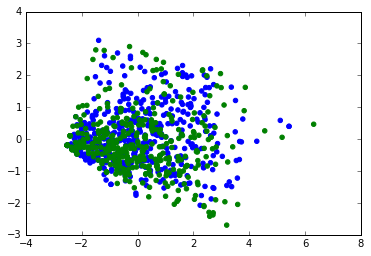

In [188]:
#first we need to map colors on labels
dfcolor = pd.DataFrame([['M','blue'],['F','green']],columns=['gender','color'])
mergeddf = pd.merge(df_pca_matrix_temp,dfcolor)

#Then we do the graph
plt.scatter(Y_pca[:,0],Y_pca[:,1],color=mergeddf['color'])
plt.show()

In [189]:
mergeddf.head()

,age_group,gender,q1,q2,q3,q4,q6,q7,user_id,sum1,color
0,3,M,8.0,8.0,8.0,8.0,7.0,1.0,568.0,40.0,blue
1,3,M,9.0,9.0,9.0,9.0,5.0,9.0,585.0,50.0,blue
2,3,M,6.0,9.0,9.0,9.0,5.0,8.0,587.0,46.0,blue
3,2,M,9.0,9.0,9.0,9.0,9.0,7.0,592.0,52.0,blue
4,1,M,9.0,9.0,1.0,8.0,9.0,9.0,594.0,45.0,blue


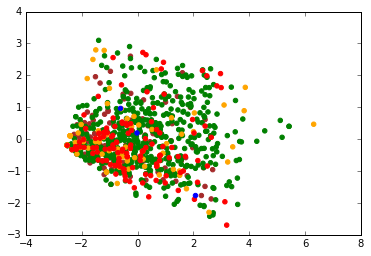

In [190]:
dfcolor = pd.DataFrame([['0','blue'],['1','green'],['2','red'],['3','brown'],['4','orange']],columns=['age_group','color'])
mergeddf = pd.merge(df_pca_matrix_temp,dfcolor)

#Then we do the graph
plt.scatter(Y_pca[:,0],Y_pca[:,1],color=mergeddf['color'])
plt.show()

In [191]:
df_pca_matrix_temp.mean()

q1            6.330286
q2            5.853714
q3            6.224000
q4            5.899429
q6            6.078857
q7            6.485714
user_id    1848.861714
sum1         36.872000
dtype: float64

<Container object of 3 artists>

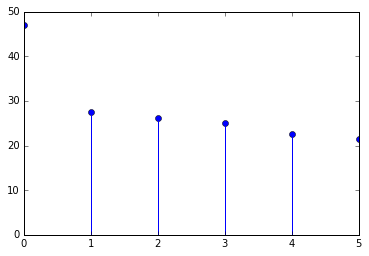

In [192]:
X_std = StandardScaler().fit_transform(X);
U, S, VT = np.linalg.svd(X_std)
plt.stem(S)

In [193]:
n = 2  # Take the first two most significant principal components (see singular values above)
first_component, second_component = VT[:n]
print('First principal component is:', np.round(first_component, 3))
print('Second principal component is:', np.round(second_component, 3))

First principal component is: [-0.301 -0.4   -0.444 -0.435 -0.411 -0.441]
Second principal component is: [-0.881 -0.123  0.173 -0.033  0.244  0.344]


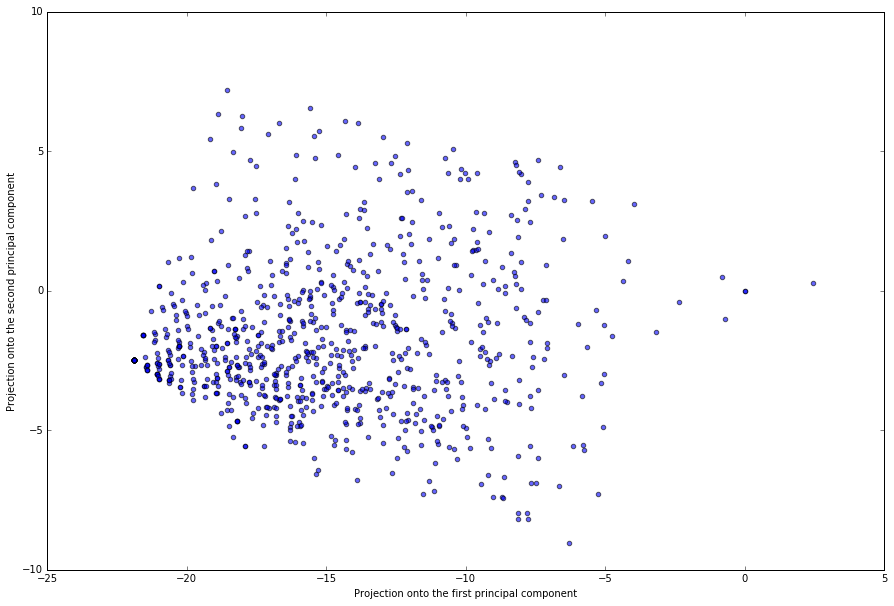

In [194]:
# Taking the transpose of `normalized_ratings`: first participant -> first column, etc.
x = first_component.dot(df_pca_new.T)
y = second_component.dot(df_pca_new.T)
plt.figure(figsize=(15, 10))
plt.xlabel('Projection onto the first principal component')
plt.ylabel('Projection onto the second principal component')
plt.scatter(x, y, alpha=0.6)

## PCA END

## creating normalized matrix for correlation

In [158]:
df_cor_matrix.head()

,age,age_group,gender,q1,q2,q3,q4,q5,q6,q7,q8,user_id,sum1
0,50.0,3,M,8.0,8.0,8.0,8.0,2.0,7.0,1.0,1.0,568.0,40.0
1,22.0,1,F,0.0,9.0,9.0,9.0,8.0,5.0,9.0,9.0,577.0,41.0
2,66.0,4,F,0.0,9.0,9.0,0.0,7.0,9.0,9.0,0.0,579.0,36.0
3,56.0,4,F,8.0,9.0,9.0,8.0,7.0,9.0,9.0,9.0,578.0,52.0
4,61.0,4,F,9.0,8.0,9.0,7.0,7.0,9.0,9.0,9.0,580.0,51.0


In [159]:
df_cor_matrix1 = df_cor_matrix.drop(['user_id'], axis = 1)
df_cor_matrix1 = df_cor_matrix1.replace({'Name:': np.nan}, regex=True)
df_cor_matrix1.q1 = df_cor_matrix1.q1.astype(float)
df_cor_matrix1.age = df_cor_matrix1.age.astype(float)
df_cor_matrix1.q2 = df_cor_matrix1.q2.astype(float)
df_cor_matrix1.q3 = df_cor_matrix1.q3.astype(float)
df_cor_matrix1.q4 = df_cor_matrix1.q4.astype(float)
df_cor_matrix1.q5 = df_cor_matrix1.q5.astype(float)
df_cor_matrix1.q6 = df_cor_matrix1.q6.astype(float)
df_cor_matrix1.q7 = df_cor_matrix1.q7.astype(float)
df_cor_matrix1.q8 = df_cor_matrix1.q8.astype(float)
df_cor_matrix1.dtypes


age          float64
age_group     object
gender        object
q1           float64
q2           float64
q3           float64
q4           float64
q5           float64
q6           float64
q7           float64
q8           float64
sum1         float64
dtype: object

In [222]:
df_cor_matrix1.isnull().sum()

age    101
q1      92
q2      99
q3     101
q4     105
q5     106
q6     106
q7     108
q8     110
dtype: int64

In [223]:
df_cor_matrix1 = df_cor_matrix1.fillna(df_cor_matrix1.mean())
df_norm = (df_cor_matrix1 - df_cor_matrix1.mean()) / (df_cor_matrix1.max() - df_cor_matrix1.min())
df_norm.head()

,age,q1,q2,q3,q4,q5,q6,q7,q8
0,0.248080,0.155529,0.194863,0.162967,0.192915,-0.265491,0.084896,-0.498161,-0.331081
1,-0.066526,-0.571744,0.285772,0.253877,0.283824,0.279963,-0.096922,0.229111,0.468919
2,0.427856,-0.571744,0.285772,0.253877,-0.534358,0.189054,0.266714,0.229111,-0.431081
3,0.315496,0.155529,0.285772,0.253877,0.192915,0.189054,0.266714,0.229111,0.468919
4,0.371676,0.246438,0.194863,0.253877,0.102005,0.189054,0.266714,0.229111,0.468919


In [224]:
df_norm.isnull().sum()

age    0
q1     0
q2     0
q3     0
q4     0
q5     0
q6     0
q7     0
q8     0
dtype: int64

In [225]:
correlations = {}
columns = df_norm.columns.tolist()
for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] =spearmanr(df_norm.loc[:, col_a], df_norm.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['r', 'p-value']

print(result.sort_index())

                r       p-value
age__q1  0.206071  4.946704e-11
age__q2  0.286134  2.931541e-20
age__q3  0.236164  4.076713e-14
age__q4  0.223883  8.375431e-13
age__q5 -0.143272  5.521734e-06
age__q6  0.199148  2.194208e-10
age__q7  0.260359  6.308341e-17
age__q8 -0.092861  3.321898e-03
q1__q2   0.240850  1.229000e-14
q1__q3   0.281070  1.413129e-19
q1__q4   0.247959  1.896380e-15
q1__q5   0.057951  6.725079e-02
q1__q6   0.215890  5.458898e-12
q1__q7   0.244919  4.247571e-15
q1__q8   0.004235  8.937058e-01
q2__q3   0.354829  5.575909e-31
q2__q4   0.439429  2.263671e-48
q2__q5   0.100392  1.495520e-03
q2__q6   0.352018  1.740403e-30
q2__q7   0.339172  2.738951e-28
q2__q8  -0.033012  2.974776e-01
q3__q4   0.417846  1.904071e-43
q3__q5   0.139473  9.768704e-06
q3__q6   0.333437  2.429788e-27
q3__q7   0.498811  6.701650e-64
q3__q8  -0.031549  3.194121e-01
q4__q5   0.162496  2.451857e-07
q4__q6   0.318279  6.250399e-25
q4__q7   0.387431  4.329655e-37
q4__q8  -0.018160  5.666210e-01
q5__q6  

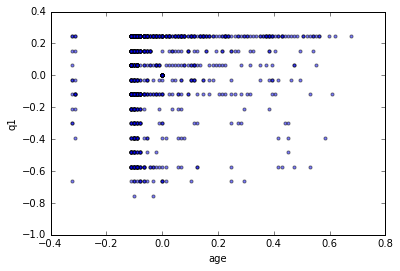

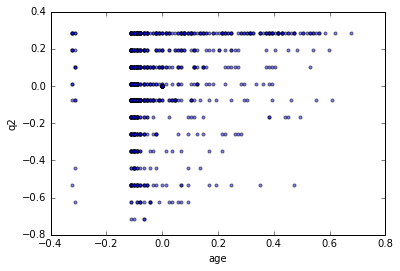

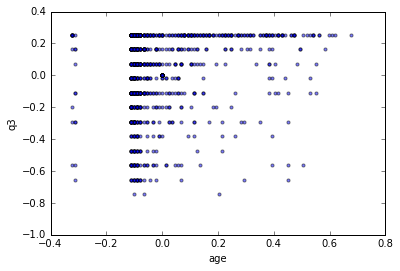

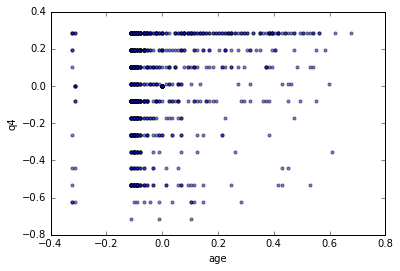

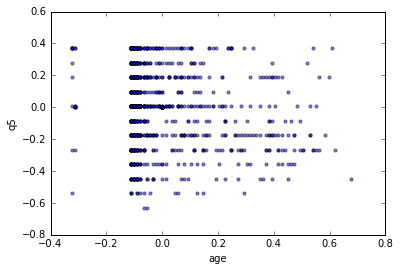

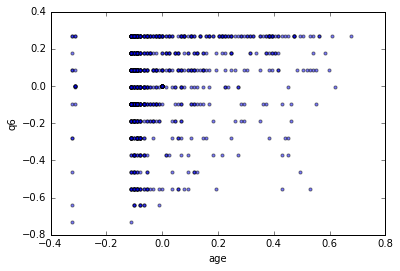

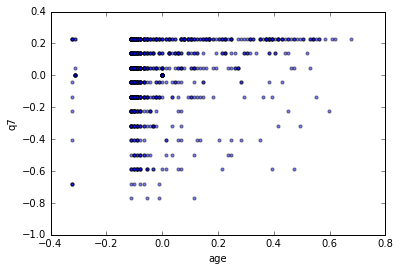

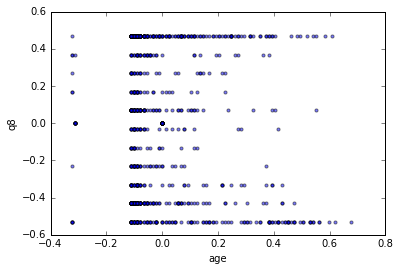

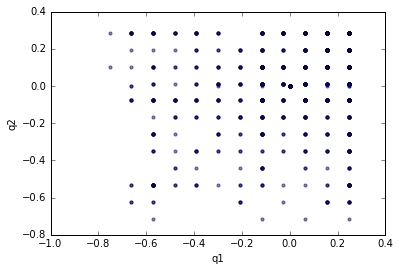

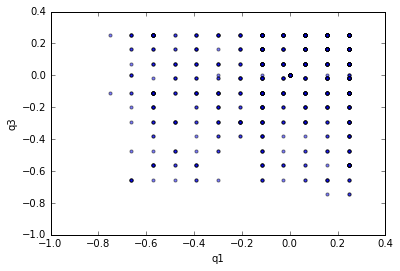

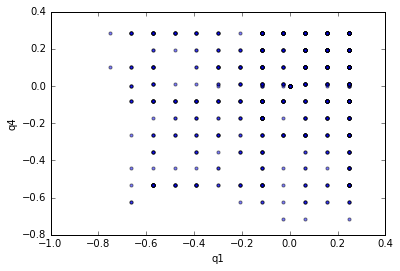

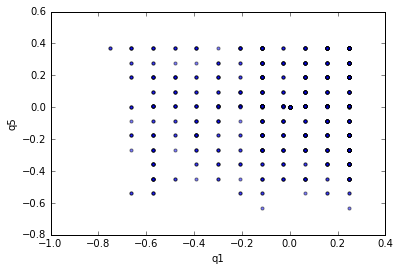

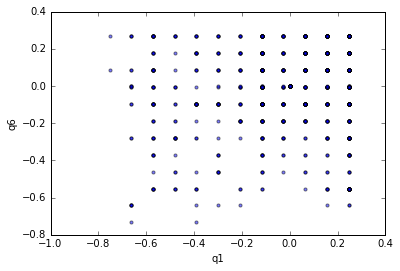

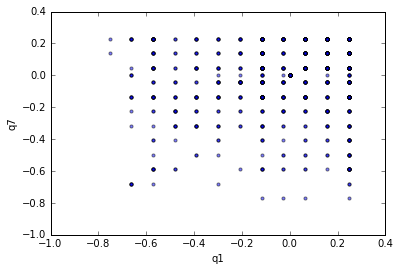

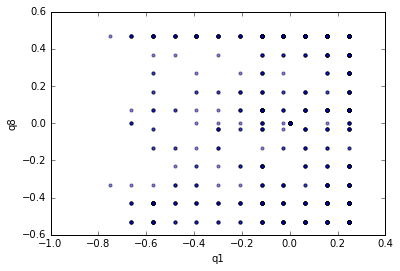

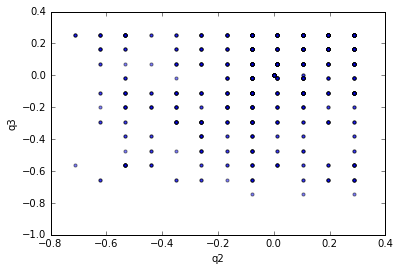

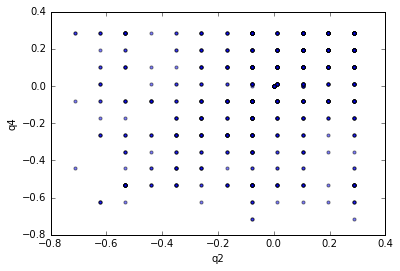

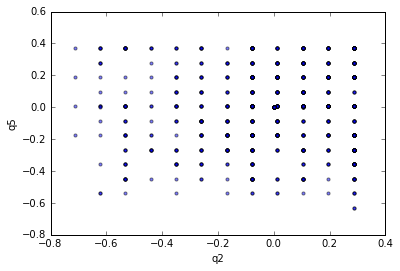

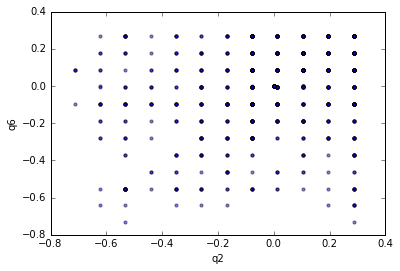

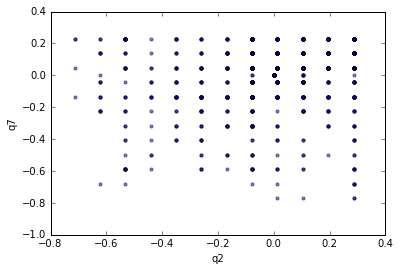

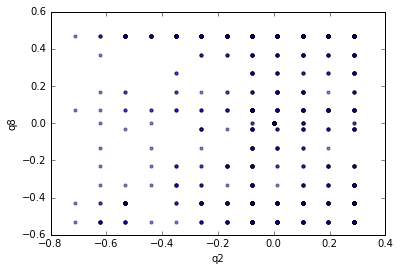

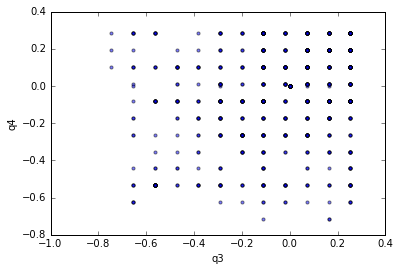

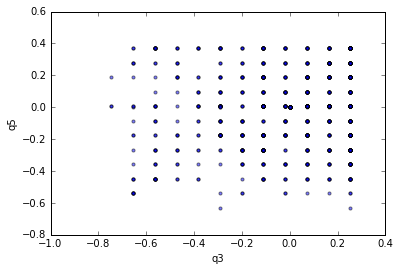

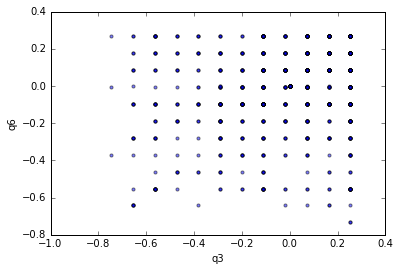

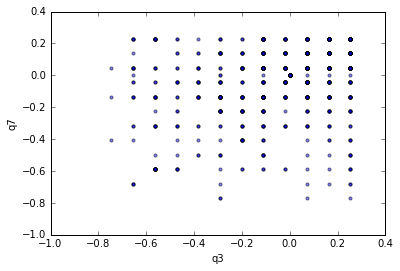

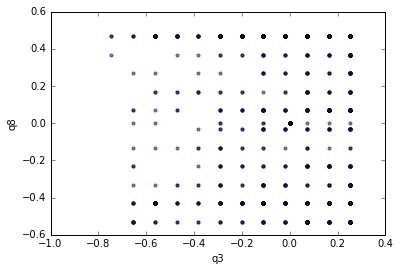

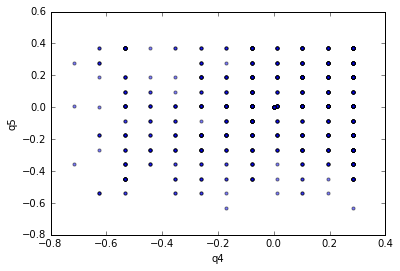

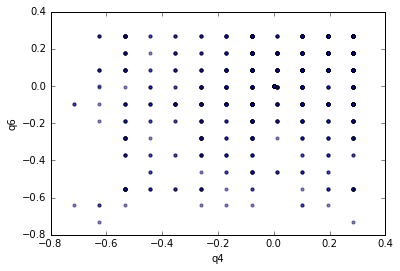

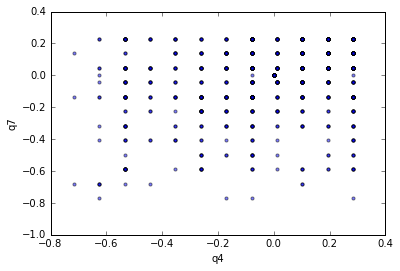

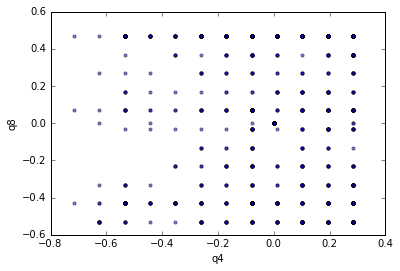

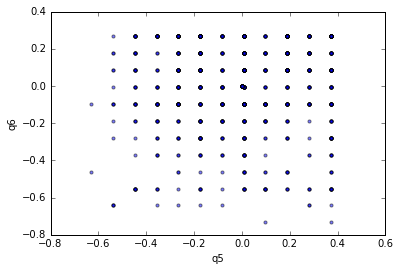

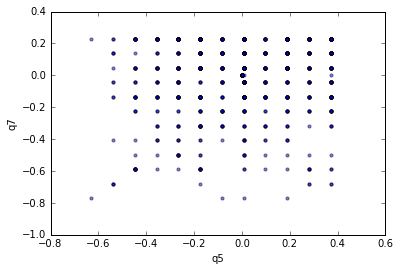

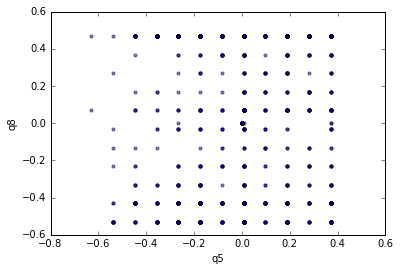

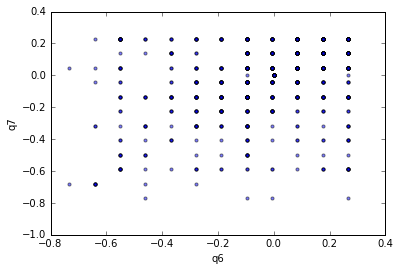

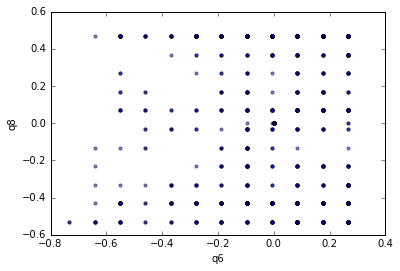

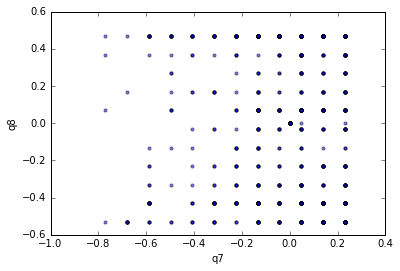

In [226]:


# colors = (0,0,0)
area = np.pi*3
columns = df_norm.columns.tolist()
for col_a, col_b in itertools.combinations(columns, 2):
#     correlations[col_a + '__' + col_b] = pearsonr(df_temp_matrix.loc[:, col_a], df_temp_matrix.loc[:, col_b])
    plt.scatter(df_norm.loc[:, col_a], df_norm.loc[:, col_b], s=area, alpha=0.5)
#     plt.title('Scatter plot pythonspot.com')
    plt.xlabel(col_a)
    plt.ylabel(col_b)
    plt.show()
